#  Bölüm 5: Fay Tipine Göre Deprem Analizi

Bu bölümde Marmara Bölgesi'ndeki depremler, bulundukları fay tipine göre analiz edilmiştir. Amaç, farklı fay türlerinin oluşturduğu depremlerin karakteristik özelliklerini incelemektir.

## Hedefler:
- Fay türlerine göre deprem sayıları
- Ortalama büyüklük ve derinlik karşılaştırmaları
- Boxplot ve bar chart ile görsel analiz


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV'yi yükle
df = pd.read_csv("marmara_faults_earthquakes_2000_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Marmara filtrelemesi
df_marmara = df[(df['Latitude'] > 39) & (df['Latitude'] < 42) &
                (df['Longitude'] > 26) & (df['Longitude'] < 31)].copy()


In [3]:
df_istanbul = df_marmara[(df_marmara['Latitude'] >= 40.8) & (df_marmara['Latitude'] <= 41.3) &
                         (df_marmara['Longitude'] >= 28.6) & (df_marmara['Longitude'] <= 29.4)].copy()


/var/folders/tc/9f8gwqk17s1ftjm1fzxst5_c0000gn/T/ipykernel_35666/3734095782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fault_counts.index, y=fault_counts.values, palette="viridis")


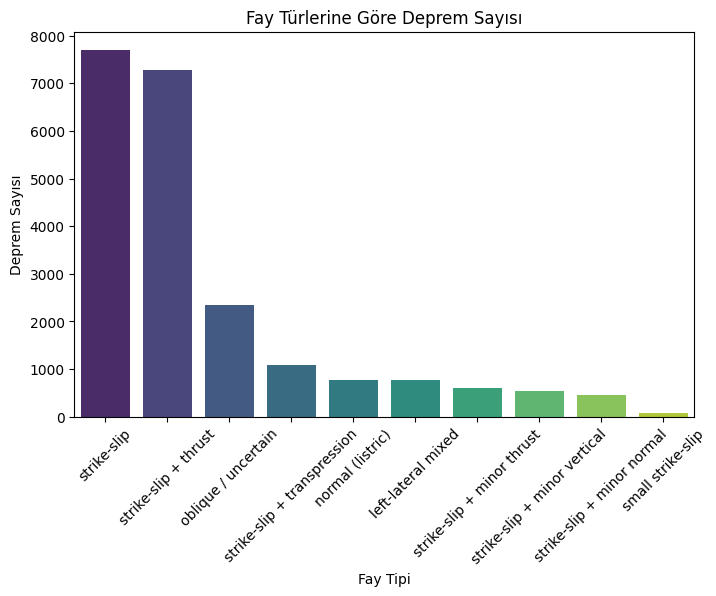

In [4]:
fault_counts = df_marmara['Fault_Type'].value_counts()

# Görsel
plt.figure(figsize=(8, 5))
sns.barplot(x=fault_counts.index, y=fault_counts.values, palette="viridis")
plt.title('Fay Türlerine Göre Deprem Sayısı')
plt.xlabel('Fay Tipi')
plt.ylabel('Deprem Sayısı')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Gruplama
fault_stats = df_marmara.groupby('Fault_Type')[['Magnitude_ML', 'Depth_km']].mean().sort_values('Magnitude_ML', ascending=False)
fault_stats


,Magnitude_ML,Depth_km
Fault_Type,,
strike-slip + thrust,2.658124,8.439069
normal (listric),2.632203,8.808696
strike-slip + minor thrust,2.604463,8.029719
strike-slip + minor vertical,2.602239,8.573806
strike-slip,2.598286,8.492544
left-lateral mixed,2.587811,7.908847
strike-slip + minor normal,2.577728,8.064276
strike-slip + transpression,2.562983,8.509291
oblique / uncertain,2.542704,8.464219


/var/folders/tc/9f8gwqk17s1ftjm1fzxst5_c0000gn/T/ipykernel_35666/499189763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_marmara, x='Fault_Type', y='Magnitude_ML', palette="Set2")
/var/folders/tc/9f8gwqk17s1ftjm1fzxst5_c0000gn/T/ipykernel_35666/499189763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_marmara, x='Fault_Type', y='Depth_km', palette="Set3")


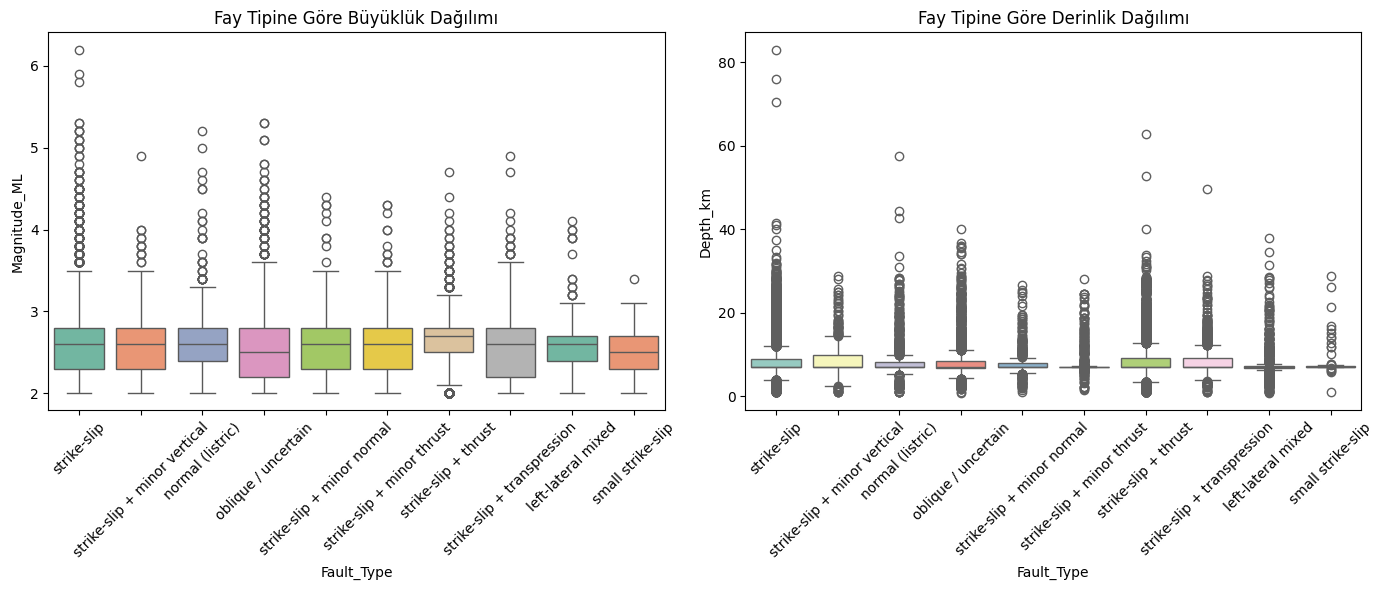

In [6]:
plt.figure(figsize=(14, 6))

# Büyüklük
plt.subplot(1, 2, 1)
sns.boxplot(data=df_marmara, x='Fault_Type', y='Magnitude_ML', palette="Set2")
plt.title('Fay Tipine Göre Büyüklük Dağılımı')
plt.xticks(rotation=45)

# Derinlik
plt.subplot(1, 2, 2)
sns.boxplot(data=df_marmara, x='Fault_Type', y='Depth_km', palette="Set3")
plt.title('Fay Tipine Göre Derinlik Dağılımı')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 🧭 Fay Tipine Göre Deprem Analizi

Bu bölümde Marmara Bölgesi’nde meydana gelen depremler, ait oldukları fay tiplerine göre analiz edilmiştir. Amaç, farklı fay türlerinin oluşturduğu depremlerin büyüklük ve derinlik açısından nasıl farklılık gösterdiğini incelemektir.

---

### 📊 Yapılan Analizler:
- Fay türlerine göre toplam deprem sayıları (bar grafiği)
- Ortalama büyüklük (`Magnitude_ML`) ve ortalama derinlik (`Depth_km`) karşılaştırması (istatistiksel tablo)
- Fay türlerine göre büyüklük ve derinlik dağılımları (boxplot)

---

### 🔍 Gözlemler:
- Bazı fay türleri diğerlerine kıyasla çok daha fazla deprem üretmiştir (örneğin "Strike-slip" tipi).
- Ortalama büyüklük açısından farklılıklar gözlemlenmekte, bazı fay türleri daha büyük depremlere yol açmaktadır.
- Boxplot analizinde bazı fay türlerinin çok sayıda **uç değer (outlier)** içerdiği görülmüştür. Bu durum o fayların zaman zaman çok büyük veya çok sığ derinlikte depremler üretebildiğini göstermektedir.
- Fay türüne göre derinlik dağılımı da çeşitlilik göstermektedir; bazıları yüzeye daha yakın odaklıdır.

---

✅ Bu analiz, bölgedeki aktif fayların risk düzeylerini karşılaştırmak ve jeolojik özelliklerin sismik etkilerini daha iyi anlamak için önemlidir.
